In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import pickle
with open("pickle/dic_minmax.pickle", "rb") as handle:
    dic_minmax = pickle.load(handle)
print( dic_minmax.keys() )
print( len(dic_minmax['path']) )

dict_keys(['x_max', 'y_max', 'z_max', 'x_min', 'y_min', 'z_min', 'sum_max', 'sum_min', 'path'])
58631


In [3]:
import pickle
with open("pickle/dic_minmax_test.pickle", "rb") as handle:
    dic_test = pickle.load(handle)
print( dic_test.keys() )
print( len(dic_test['path']) )

dict_keys(['x_max', 'y_max', 'z_max', 'x_min', 'y_min', 'z_min', 'sum_max', 'sum_min', 'path'])
8744


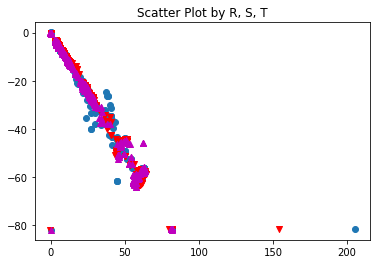

In [4]:
plt.scatter(dic_minmax['x_max'], dic_minmax['x_min'])
plt.scatter(dic_minmax['y_max'], dic_minmax['y_min'], marker='v', color='r')
plt.scatter(dic_minmax['z_max'], dic_minmax['z_min'], marker='^', color='m')
plt.title('Scatter Plot by R, S, T')
plt.show()

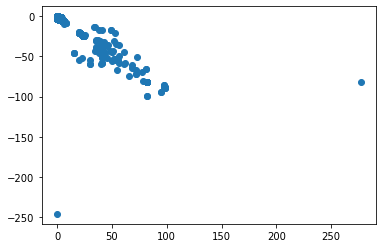

In [5]:
plt.scatter(dic_minmax['sum_max'], dic_minmax['sum_min'])

이번에는 r, s, t 전류를 3차원상에 그려보자.

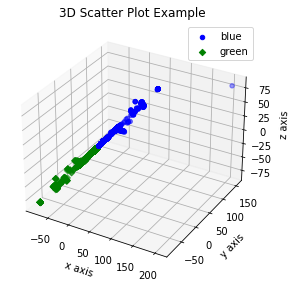

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(dic_minmax['x_max'], dic_minmax['y_max'], dic_minmax['z_max'], c='b', marker='o', label='blue')
ax.scatter(dic_minmax['x_min'], dic_minmax['y_min'], dic_minmax['z_min'], c='g', marker='D', label='green')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
df = pd.DataFrame({'x_max' : dic_minmax['x_max'],
                   'y_max' : dic_minmax['y_max'],
                   'z_max' : dic_minmax['z_max'],
                  'x_min' : dic_minmax['x_min'],
                  'y_min' : dic_minmax['y_min'],
                  'z_min' : dic_minmax['z_min'],
                  'sum_max' : dic_minmax['sum_max'], 
                  'sum_min' : dic_minmax['sum_min'] 
                  })
dic_minmax =  None
print(len(df))

df.head()

58631


,x_max,y_max,z_max,x_min,y_min,z_min,sum_max,sum_min
0,5.054932,5.094971,5.094971,-5.475342,-5.635498,-5.155029,-0.250244,-0.890869
1,4.043945,4.164062,4.003906,-3.923828,-4.364258,-4.204102,0.280273,-0.560547
2,3.283203,3.483398,3.483398,-3.443359,-3.683594,-4.003906,-0.320312,-0.800781
3,3.333252,3.293213,3.333252,-3.473389,-3.553467,-3.873779,-0.290283,-0.730713
4,4.604492,4.804688,4.804688,-5.165039,-5.325195,-4.804688,-0.320312,-0.960938


In [8]:
df_test = pd.DataFrame({'x_max' : dic_test['x_max'],
                   'y_max' : dic_test['y_max'],
                   'z_max' : dic_test['z_max'],
                  'x_min' : dic_test['x_min'],
                  'y_min' : dic_test['y_min'],
                  'z_min' : dic_test['z_min'],
                  'sum_max' : dic_test['sum_max'], 
                  'sum_min' : dic_test['sum_min'] 
                  })
dic_test =  None
print(len(df_test))

df_test.head()

8744


,x_max,y_max,z_max,x_min,y_min,z_min,sum_max,sum_min
0,6.085938,6.125977,7.046875,-6.446289,-6.766602,-7.207031,1.081055,-2.402344
1,6.005859,6.045898,7.006836,-6.406250,-6.726562,-7.046875,1.081055,-2.322266
2,3.163086,3.323242,3.243164,-3.363281,-3.523438,-3.843750,-0.360352,-0.720703
3,6.526367,6.166016,6.846680,-6.846680,-7.006836,-6.926758,1.161133,-2.362305
4,12.972656,10.370117,12.091797,-13.092773,-10.570312,-12.732422,5.044922,-5.685547


# Linear Regression

label이 없기때문에 z값을 구하는 것으로 진행

In [9]:
X_train = df[['x_max', 'y_max']]
X_train.append(df[['x_min', 'y_min']])
y_train = df['z_max']
y_train.append(df['z_min'])

X_test = df_test[['x_max', 'y_max']]
X_test.append(df_test[['x_min', 'y_min']])
y_test = df_test['z_max']
y_test.append(df_test['z_min'])

0        7.046875
1        7.006836
2        3.243164
3        6.846680
4       12.091797
          ...    
8739    -4.364258
8740    -7.207031
8741    -3.883789
8742    -7.166992
8743    -7.046875
Length: 17488, dtype: float64

In [10]:
len(X_train), len(y_train)

(58631, 58631)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [12]:
result = model.fit(X_train, y_train)

In [13]:
y_pred = model.predict(X_test)
len(y_pred)

8744

In [14]:
X_test

,x_max,y_max
0,6.085938,6.125977
1,6.005859,6.045898
2,3.163086,3.323242
3,6.526367,6.166016
4,12.972656,10.370117
...,...,...
8739,4.204102,4.204102
8740,6.286133,6.045898
8741,3.363281,3.323242
8742,6.206055,6.045898


### 평가지표

#### R-squared ( R² ) : model의 설명력

추정한 선형 모형이 주어진 자료에 얼마나 적합한지 정도를 재는 척도이다.

1에 가까울수록 종속 변인과 독립변인 사이에 상관관계가 높고, 이것은 회귀모형의 유용성이 높다는 뜻이다.

R²가 0.9972이고, 이것은 'feature(r, s, t의 max값)이 label(r, s, t의 min값)에 대해 99.72%만큼 설명한다

#### MSE ( 평균 제곱 오차 ) 

- 평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수
- 잔차(오차)의 제곱에 대한 평균을 취한 값
- 정확도에 대한 질적인 척도로 수치가 낮을수록 정확성이 높은 것이다.(오차가 덜 난다.)

![MSE](https://mblogthumb-phinf.pstatic.net/MjAxOTA0MThfMjM1/MDAxNTU1NTUxMTkyMTY3.FZHK2aZEhoSm1E3SONu9XMGL7oBaF7DTCDBGlGaEtLYg.bQvZCdzt9we3XrfRIapE4gWutZgUn-3Hpw5y-Db0CYsg.PNG.heygun/%EC%BA%A1%EC%B2%98.PNG?type=w800)

#### MAE ( 평균 절대 오차 )

- 회귀 지표로 사용
- 오차의 절대값의 평균
![MAE](https://mblogthumb-phinf.pstatic.net/MjAxOTA0MTlfMTE2/MDAxNTU1NjQxODUxODM5.yjA6oVXwfpeQ3GIfKah92M1hLYHp6GwrkUfBaNpC0JUg.jEpffpINW4ODX0FvboPEAe8-1RfYJ1umhC2M4fhc0nQg.PNG.heygun/MAE.PNG?type=w800)


#### MAE와 MSE의 차이는 무엇인가?

  -MSE는 제곱을 해주고 / MAE는 제곱은 하지 않고 절대값을 구한다.
  

MAE와 MSE의 공통점은 무엇인가?

  - 실제값과 측정값을 빼주는 것 

   - 평균을 내주는 것 (M - mean)

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("r2 : ", r2)
print('mae : ', mae)

r2 :  0.983538707177716
mae :  0.4837904948858119


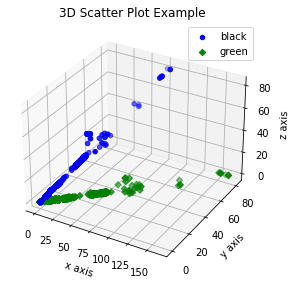

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# train 데이터 : 검정색 점
# plt.scatter(X_train, y_train, color='black', linewidth=1)

# # test 데이터에 대한 예측 : 파란색 점
# plt.scatter(X_test, y_test, color='blue', linewidth=0.5)
# plt.scatter(X_test, y_pred, color='red', linewidth=0.5)


ax.scatter(df_test['x_max'], df_test['y_max'], df_test['z_max'], c='b', marker='o', label='blue')
ax.scatter(X_test['x_max'] + X_test['y_max'], y_test, c='g', marker='D', label='green')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# coe[0] * x + coe[1] * y + intercept == z
print("회귀계수 coefficient :",model.coef_)
print("y절편 :", model.intercept_)

회귀계수 coefficient: [0.02050358 0.97583015]
y절편 : 0.27823951578994066


train 값으로 훈련시켰던 가중치로 test값을 예측했더니 실제 z값과 예측한 z값의 차이가 매우 크다.

어떻게 이상치를 구할 수 있을까?